In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif



In [14]:
# Load dataset
file_path = r"C:\Users\HP\Desktop\work\malaria\data.xlsx"
df = pd.read_excel(file_path)
df.head()


,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,...,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2024,regcode,update,dataset_id
0,Afghanistan,2015,DHS Program - DHS,ML_FEVR_C_FEV,Children aged < 5 years with fever in the last...,Child's age (5 groups) (<12-59m),12-23 months,35.299999,NaN,NaN,...,0,100,1,2,0,Eastern Mediterranean,Low income,NaN,01 October 2024,rep_dhs_unicef_malaria
1,Afghanistan,2015,DHS Program - DHS,ML_FEVR_C_FEV,Children aged < 5 years with fever in the last...,Child's age (5 groups) (<12-59m),24-35 months,31.700001,NaN,NaN,...,0,100,1,3,0,Eastern Mediterranean,Low income,NaN,01 October 2024,rep_dhs_unicef_malaria
2,Afghanistan,2015,DHS Program - DHS,ML_FEVR_C_FEV,Children aged < 5 years with fever in the last...,Child's age (5 groups) (<12-59m),36-47 months,27.100000,NaN,NaN,...,0,100,1,4,0,Eastern Mediterranean,Low income,NaN,01 October 2024,rep_dhs_unicef_malaria
3,Afghanistan,2015,DHS Program - DHS,ML_FEVR_C_FEV,Children aged < 5 years with fever in the last...,Child's age (5 groups) (<12-59m),48-59 months,20.100000,NaN,NaN,...,0,100,1,5,0,Eastern Mediterranean,Low income,NaN,01 October 2024,rep_dhs_unicef_malaria
4,Afghanistan,2015,DHS Program - DHS,ML_FEVR_C_FEV,Children aged < 5 years with fever in the last...,Child's age (5 groups) (<12-59m),<12 months,29.400000,NaN,NaN,...,0,100,1,1,0,Eastern Mediterranean,Low income,NaN,01 October 2024,rep_dhs_unicef_malaria


In [15]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49021 entries, 0 to 49020
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   setting               49021 non-null  object 
 1   date                  49021 non-null  int64  
 2   source                49021 non-null  object 
 3   indicator_abbr        49021 non-null  object 
 4   indicator_name        49021 non-null  object 
 5   dimension             49021 non-null  object 
 6   subgroup              49021 non-null  object 
 7   estimate              48518 non-null  float64
 8   se                    0 non-null      float64
 9   ci_lb                 3866 non-null   float64
 10  ci_ub                 3866 non-null   float64
 11  population            46173 non-null  float64
 12  flag                  49021 non-null  object 
 13  setting_average       48992 non-null  float64
 14  iso3                  49021 non-null  object 
 15  favourable_indicato

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values:\n", missing_data[missing_data['Missing Values'] > 0])



Missing Values:
                  Missing Values  Percentage
estimate                    503    1.026091
se                        49021  100.000000
ci_lb                     45155   92.113584
ci_ub                     45155   92.113584
population                 2848    5.809755
setting_average              29    0.059158
regcode                   34720   70.826789


In [17]:

# Drop columns with too many missing values
drop_cols = ['se', 'ci_lb', 'ci_ub', 'regcode']
df_cleaned = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Fill missing values with median for selected columns
for col in ['population', 'setting_average', 'estimate']:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())


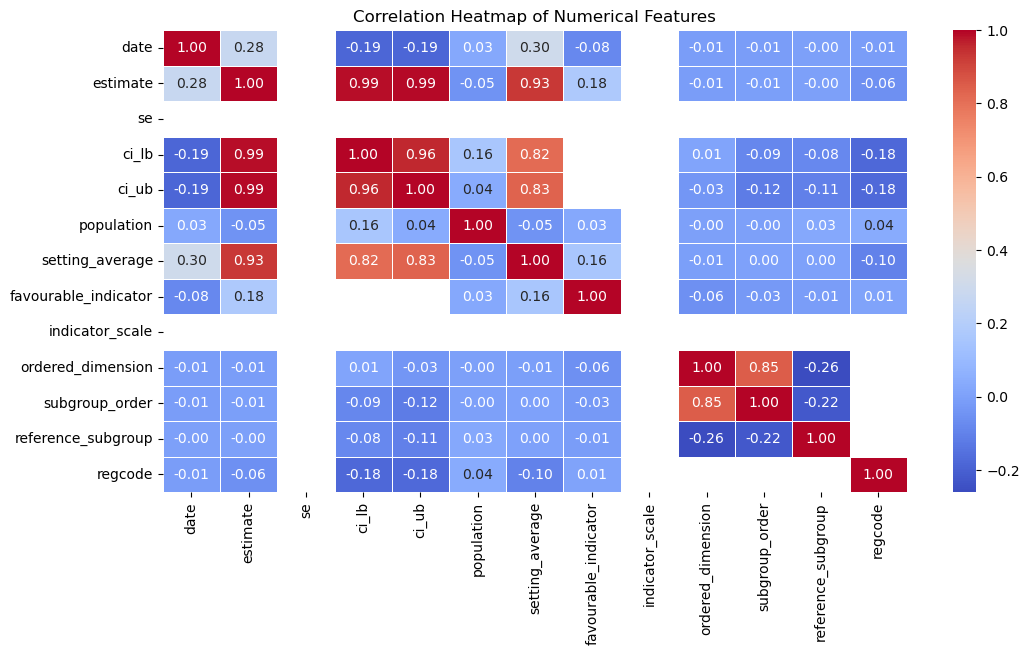

(               date      estimate   se        ci_lb        ci_ub  \
 count  49021.000000  48518.000000  0.0  3866.000000  3866.000000   
 mean    2013.116399     30.937349  NaN    15.881454    25.106260   
 std        4.858499     23.437242  NaN    16.676153    20.536023   
 min     2002.000000      0.000000  NaN     0.000000     0.000000   
 25%     2010.000000     11.100000  NaN     1.300000     6.400000   
 50%     2013.000000     27.200001  NaN    10.400000    21.700001   
 75%     2017.000000     46.799999  NaN    26.100000    39.700001   
 max     2022.000000    100.000000  NaN    89.900002    97.599998   
 
          population  setting_average  favourable_indicator  indicator_scale  \
 count  4.617300e+04     48992.000000          49021.000000          49021.0   
 mean   3.436506e+03        30.687874              0.828237            100.0   
 std    2.883211e+04        21.920466              0.377178              0.0   
 min    1.000000e+00         0.000000              0.0000

In [18]:
# Drop non-numeric columns for summary statistics
numerical_df = df.select_dtypes(include=['number'])

# Summary statistics for numerical columns
summary_stats = numerical_df.describe()

# Check for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_columns}

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

summary_stats, unique_values


Exploratory Data Analysis (EDA) Summary

Summary Statistics (Numerical Columns) Date Range: 2002 - 2022 Estimate (Main Value of Interest): Mean: 30.94 Min: 0, Max: 100 Population: Ranges from 1 to 1,887,676 Setting Average: Mean 30.69, ranges from 0 to 96.6
Unique Values in Categorical Columns Countries (setting): 82 unique values Indicators (indicator_name): 20 different malaria-related indicators Regions (whoreg6): 6 regions Income Classification (wbincome2024): 4 categories Subgroups (subgroup): 735 different subcategories
Correlation Insights The heatmap shows low correlation among numerical features, except some mild associations between estimate, ci_lb, and ci_ub.

In [19]:
# Encode categorical variables
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}

df_encoded = df_cleaned.copy()
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Select numerical features (excluding target variable 'estimate')
numerical_features = df_encoded.select_dtypes(include=['number']).columns.drop('estimate')

# Compute feature importance for regression (malaria prevalence prediction)
regression_importance = mutual_info_regression(df_encoded[numerical_features], df_encoded['estimate'])
regression_feature_importance = dict(zip(numerical_features, regression_importance))

# Create a classification target (High/Low malaria risk based on median split)
median_estimate = df_cleaned['estimate'].median()
df_encoded['malaria_risk'] = (df_cleaned['estimate'] > median_estimate).astype(int)

# Compute feature importance for classification (high/low malaria risk)
classification_importance = mutual_info_classif(df_encoded[numerical_features], df_encoded['malaria_risk'])
classification_feature_importance = dict(zip(numerical_features, classification_importance))

# Select top 10 features for training
top_regression_features = [feat for feat, score in sorted(regression_feature_importance.items(), key=lambda x: x[1], reverse=True)[:10]]
top_classification_features = [feat for feat, score in sorted(classification_feature_importance.items(), key=lambda x: x[1], reverse=True)[:10]]

In [20]:

# Ensure target variable exists
target_column = 'estimate'  # Use 'malaria_risk' for classification

# Select best features for training
if target_column == 'estimate':
    X = df_encoded[top_regression_features]  # Regression features
    y = df_encoded[target_column]  # Continuous target
else:
    X = df_encoded[top_classification_features]  # Classification features
    y = df_encoded[target_column]  # Categorical target

# Ensure classification target is categorical
if target_column == 'estimate':
    # Convert continuous target to categories (e.g., high/low malaria risk)
    median_value = y.median()
    y_class = np.where(y > median_value, 1, 0)  # 1 = High, 0 = Low
else:
    y_class = LabelEncoder().fit_transform(y)  # Encode categorical labels if needed

# Split data into training & test sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)  # Regression
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)  # Classification

# Define Regression Models
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, random_state=42)
}

# Train and evaluate regression models
regression_results = {}
for name, model in regressors.items():
    model.fit(X_train, y_train_reg)
    y_pred = model.predict(X_test)
    regression_results[name] = {
        "R² Score": r2_score(y_test_reg, y_pred),
        "MSE": mean_squared_error(y_test_reg, y_pred),
        "MAE": mean_absolute_error(y_test_reg, y_pred)
    }

# Define Classification Models
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate classification models
classification_results = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train_class)
    y_pred = model.predict(X_test)
    classification_results[name] = {
        "Accuracy": accuracy_score(y_test_class, y_pred),
        "F1 Score": f1_score(y_test_class, y_pred, average='weighted'),
        "Precision": precision_score(y_test_class, y_pred, average='weighted'),
        "Recall": recall_score(y_test_class, y_pred, average='weighted')
    }

# Print results
print("\nRegression Results:")
for model, scores in regression_results.items():
    print(f"{model}: {scores}")

print("\nClassification Results:")
for model, scores in classification_results.items():
    print(f"{model}: {scores}")


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Regression Results:
Linear Regression: {'R² Score': 0.8524363374154531, 'MSE': 79.59132132820409, 'MAE': 5.796295597072881}
Decision Tree: {'R² Score': 0.8083089763184155, 'MSE': 103.39226876285943, 'MAE': 6.009362547198374}
Random Forest: {'R² Score': 0.8858001315666948, 'MSE': 61.59591233313337, 'MAE': 4.905692812521791}
XGBoost: {'R² Score': 0.8961587026115849, 'MSE': 56.00881628187818, 'MAE': 4.863185969010007}

Classification Results:
Logistic Regression: {'Accuracy': 0.898419173890872, 'F1 Score': 0.8984162279982844, 'Precision': 0.8984997156198085, 'Recall': 0.898419173890872}
Decision Tree: {'Accuracy': 0.9000509943906171, 'F1 Score': 0.9000500857412149, 'Precision': 0.9000887990435742, 'Recall': 0.9000509943906171}
Random Forest: {'Accuracy': 0.9147373788883223, 'F1 Score': 0.9147370915398718, 'Precision': 0.9147614671498228, 'Recall': 0.9147373788883223}
XGBoost: {'Accuracy': 0.9185109637939827, 'F1 Score': 0.918510762056701, 'Precision': 0.918511496634021, 'Recall': 0.91851

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:11:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
